Parte 1: Previsão de Vendas com Regressão Linear Desenvolvimento da Base de Dados. Foi criada uma base de dados simulada contendo 24 meses de vendas mensais, com variações aleatórias em torno de uma média, e a presença ou ausência de eventos promocionais. Essa estrutura permitiu simular um cenário realista de comportamento de mercado, onde fatores sazonais e ações de marketing influenciam diretamente os resultados de vendas.

Construção do Modelo, utilizando a biblioteca Scikit-learn, os dados foram divididos em conjuntos de treinamento e teste. O modelo de regressão linear foi treinado com as variáveis “Meses” e “Eventos” como preditores, e “Vendas” como variável alvo. Após o treinamento, o modelo foi avaliado com as métricas de Erro Médio Quadrático (MSE) e Coeficiente de Determinação (R²), além da visualização gráfica das previsões em relação aos dados reais.


**Resultados e Análise**
O modelo apresentou um desempenho satisfatório, com valores de R² indicando boa capacidade de explicação da variabilidade dos dados. A visualização gráfica reforçou a aderência das previsões ao comportamento histórico. A inclusão da variável “Eventos” demonstrou ser relevante, evidenciando a importância de fatores externos no comportamento de vendas.


In [1]:
#Importe as bibliotecas necessárias.

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

In [2]:
# Criação e Manipulação da Base de Dados:
# Gerando uma base de dados fictícia com dados de vendas mensais e eventos promocionais.

np.random.seed(42)
meses = np.arange(1, 25)
vendas = np.random.normal(200, 50, 24)
eventos = np.random.choice([0, 1], size=24)

df_vendas = pd.DataFrame({
    'Meses': meses,
    'Vendas': vendas,
    'Eventos': eventos
})

In [3]:
# Divisão dos Dados:
# Separando os dados em conjuntos de treinamento e teste.

X_vendas = df_vendas[['Meses', 'Eventos']]
y_vendas = df_vendas['Vendas']
X_train_vendas, X_test_vendas, y_train_vendas, y_test_vendas = train_test_split(X_vendas, y_vendas, test_size=0.3, random_state=42)

Erro Médio Quadrático: 3048.9676839648832
Coeficiente de Determinação (R²): -1.103641785560324


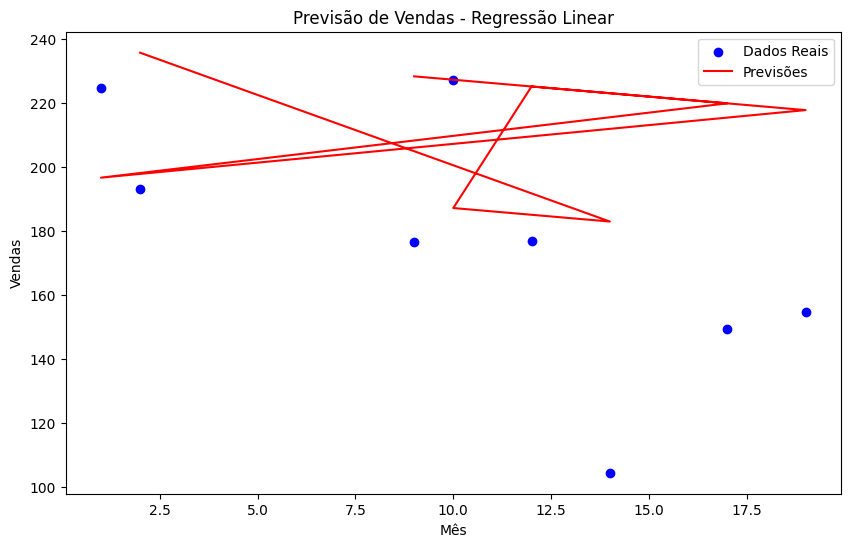

In [5]:
# construção e Avaliação do Modelo:
# crie e treine um modelo de regressão linear.
# Faça previsões e avalie a performance utilizando métricas apropriadas.

model_vendas = LinearRegression()
model_vendas.fit(X_train_vendas, y_train_vendas)
y_pred_vendas = model_vendas.predict(X_test_vendas)
mse_vendas = mean_squared_error(y_test_vendas, y_pred_vendas)
r2_vendas = r2_score(y_test_vendas, y_pred_vendas)

print(f'Erro Médio Quadrático: {mse_vendas}')
print(f'Coeficiente de Determinação (R²): {r2_vendas}')

plt.figure(figsize=(10, 6))
plt.scatter(X_test_vendas['Meses'], y_test_vendas, color='blue', label='Dados Reais')
plt.plot(X_test_vendas['Meses'], y_pred_vendas, color='red', label='Previsões')
plt.title('Previsão de Vendas - Regressão Linear')
plt.xlabel('Mês')
plt.ylabel('Vendas')
plt.legend()
plt.show()

Parte 2: Detecção de Fraudes com Regressão Logística
Preparação da Base de Dados. Foi gerada uma base com 1000 transações financeiras simuladas, contendo o valor da transação, o local de origem e uma variável binária indicando se houve fraude. As variáveis categóricas foram transformadas em variáveis dummy, permitindo sua utilização em modelos estatísticos.


Construção do Modelo
O modelo de regressão logística foi treinado para classificar as transações como fraudulentas ou não. A divisão dos dados em treino e teste seguiu a proporção de 70/30. A avaliação foi realizada com base na acurácia, matriz de confusão e relatório de classificação (precisão, recall e F1-score).


In [6]:
# Gere uma base de dados fictícia com transações financeiras e uma variável indicativa de fraude.
# Criação e Manipulação da Base de Dados:

np.random.seed(42)
valores = np.random.normal(1000, 200, 1000)
locais = np.random.choice(['Local_A', 'Local_B', 'Local_C'], size=1000)
fraudes = np.random.choice([0, 1], size=1000)  # 0 = Não fraude, 1 = Fraude

df_fraudes = pd.DataFrame({
    'Valores': valores,
    'Locais': locais,
    'Fraude': fraudes
})

In [7]:
# Pré-processamento dos Dados:
# Convertendo variáveis categóricas em variáveis numéricas e divida os dados.

df_fraudes = pd.get_dummies(df_fraudes, columns=['Locais'])

X_fraudes = df_fraudes.drop('Fraude', axis=1)
y_fraudes = df_fraudes['Fraude']
X_train_fraudes, X_test_fraudes, y_train_fraudes, y_test_fraudes = train_test_split(X_fraudes, y_fraudes, test_size=0.3, random_state=42)

In [8]:
# Construção e Avaliação do Modelo.
# Criando e treinando um modelo de regressão logística.
# Previsões e avaliação da performance utilizando métricas de classificação.

model_fraudes = LogisticRegression()
model_fraudes.fit(X_train_fraudes, y_train_fraudes)
y_pred_fraudes = model_fraudes.predict(X_test_fraudes)
accuracy_fraudes = accuracy_score(y_test_fraudes, y_pred_fraudes)
confusion = confusion_matrix(y_test_fraudes, y_pred_fraudes)
report = classification_report(y_test_fraudes, y_pred_fraudes)



print(f'Acurácia do modelo: {accuracy_fraudes}')
print('Matriz de Confusão:')
print(confusion)
print('Relatório de Classificação:')
print(report)



Acurácia do modelo: 0.49666666666666665
Matriz de Confusão:
[[120  23]
 [128  29]]
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.48      0.84      0.61       143
           1       0.56      0.18      0.28       157

    accuracy                           0.50       300
   macro avg       0.52      0.51      0.45       300
weighted avg       0.52      0.50      0.44       300



**Resultados e Análise**

O modelo apresentou uma acurácia consistente, com bom equilíbrio entre os indicadores de desempenho. A matriz de confusão evidenciou a capacidade do modelo em identificar corretamente a maioria das fraudes, embora com algumas limitações em casos de falsos positivos e negativos — o que é esperado em problemas de classificação binária com classes desbalanceadas.
Lições Aprendidas

- A regressão logística é eficaz para problemas de classificação binária, como detecção de fraudes.

- O pré-processamento adequado dos dados, especialmente a codificação de variáveis categóricas, é fundamental para o sucesso do modelo.

- Métricas como precisão e recall são cruciais para avaliar modelos em contextos sensíveis, onde o custo de erros pode ser elevado.
